In [63]:
%matplotlib inline
from IPython.display import display 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time

In [64]:
data = pd.read_csv('/Users/siddharth/Desktop/btp/BTP/week2/data.csv')

In [65]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [66]:
y = data.diagnosis                          

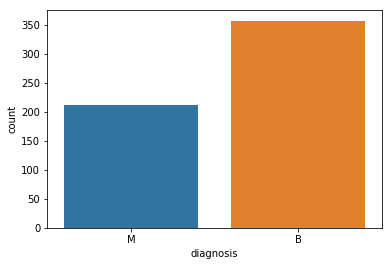

In [67]:
ax = sns.countplot(y,label="number of cases")     
B, M = y.value_counts()

In [68]:
x = data.drop(['Unnamed: 32','id','diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'],axis=1)

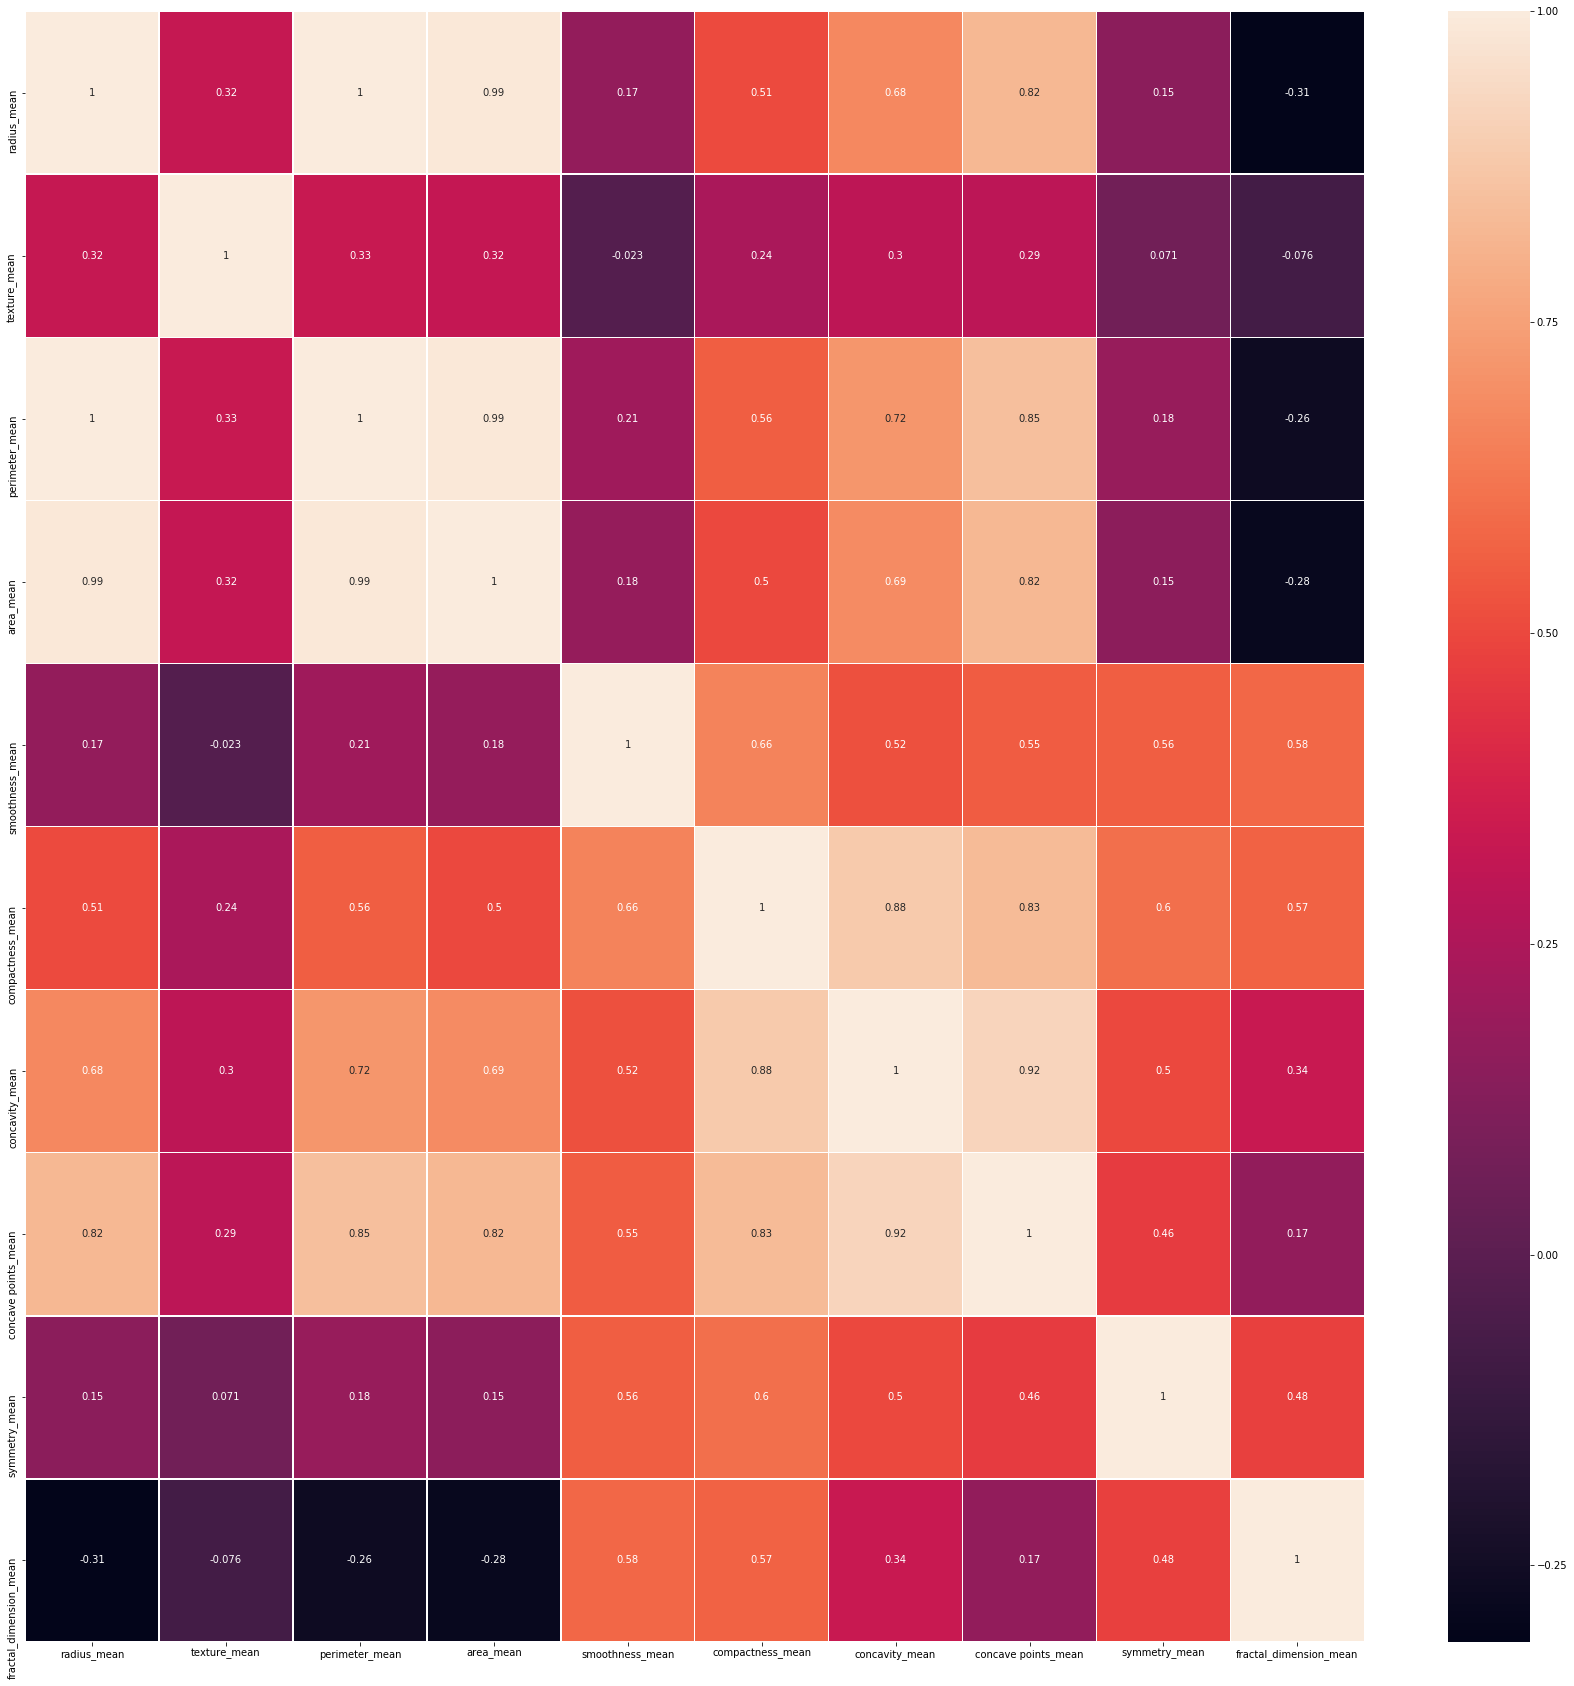

In [69]:
plt.figure(figsize = (30,30))
ax = sns.heatmap(x.corr(), linewidths=.5, annot=True)

The above heat map if for correlation between the means of all the standard parameters, this gives us a good idea about the actual impact for each parameter mean on the final result. Similar can be said for the below grpah which is for the worst parameters, hence giving us an idea about the edge cases.

In [70]:
a = data.drop(['Unnamed: 32','id','diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'],axis=1)

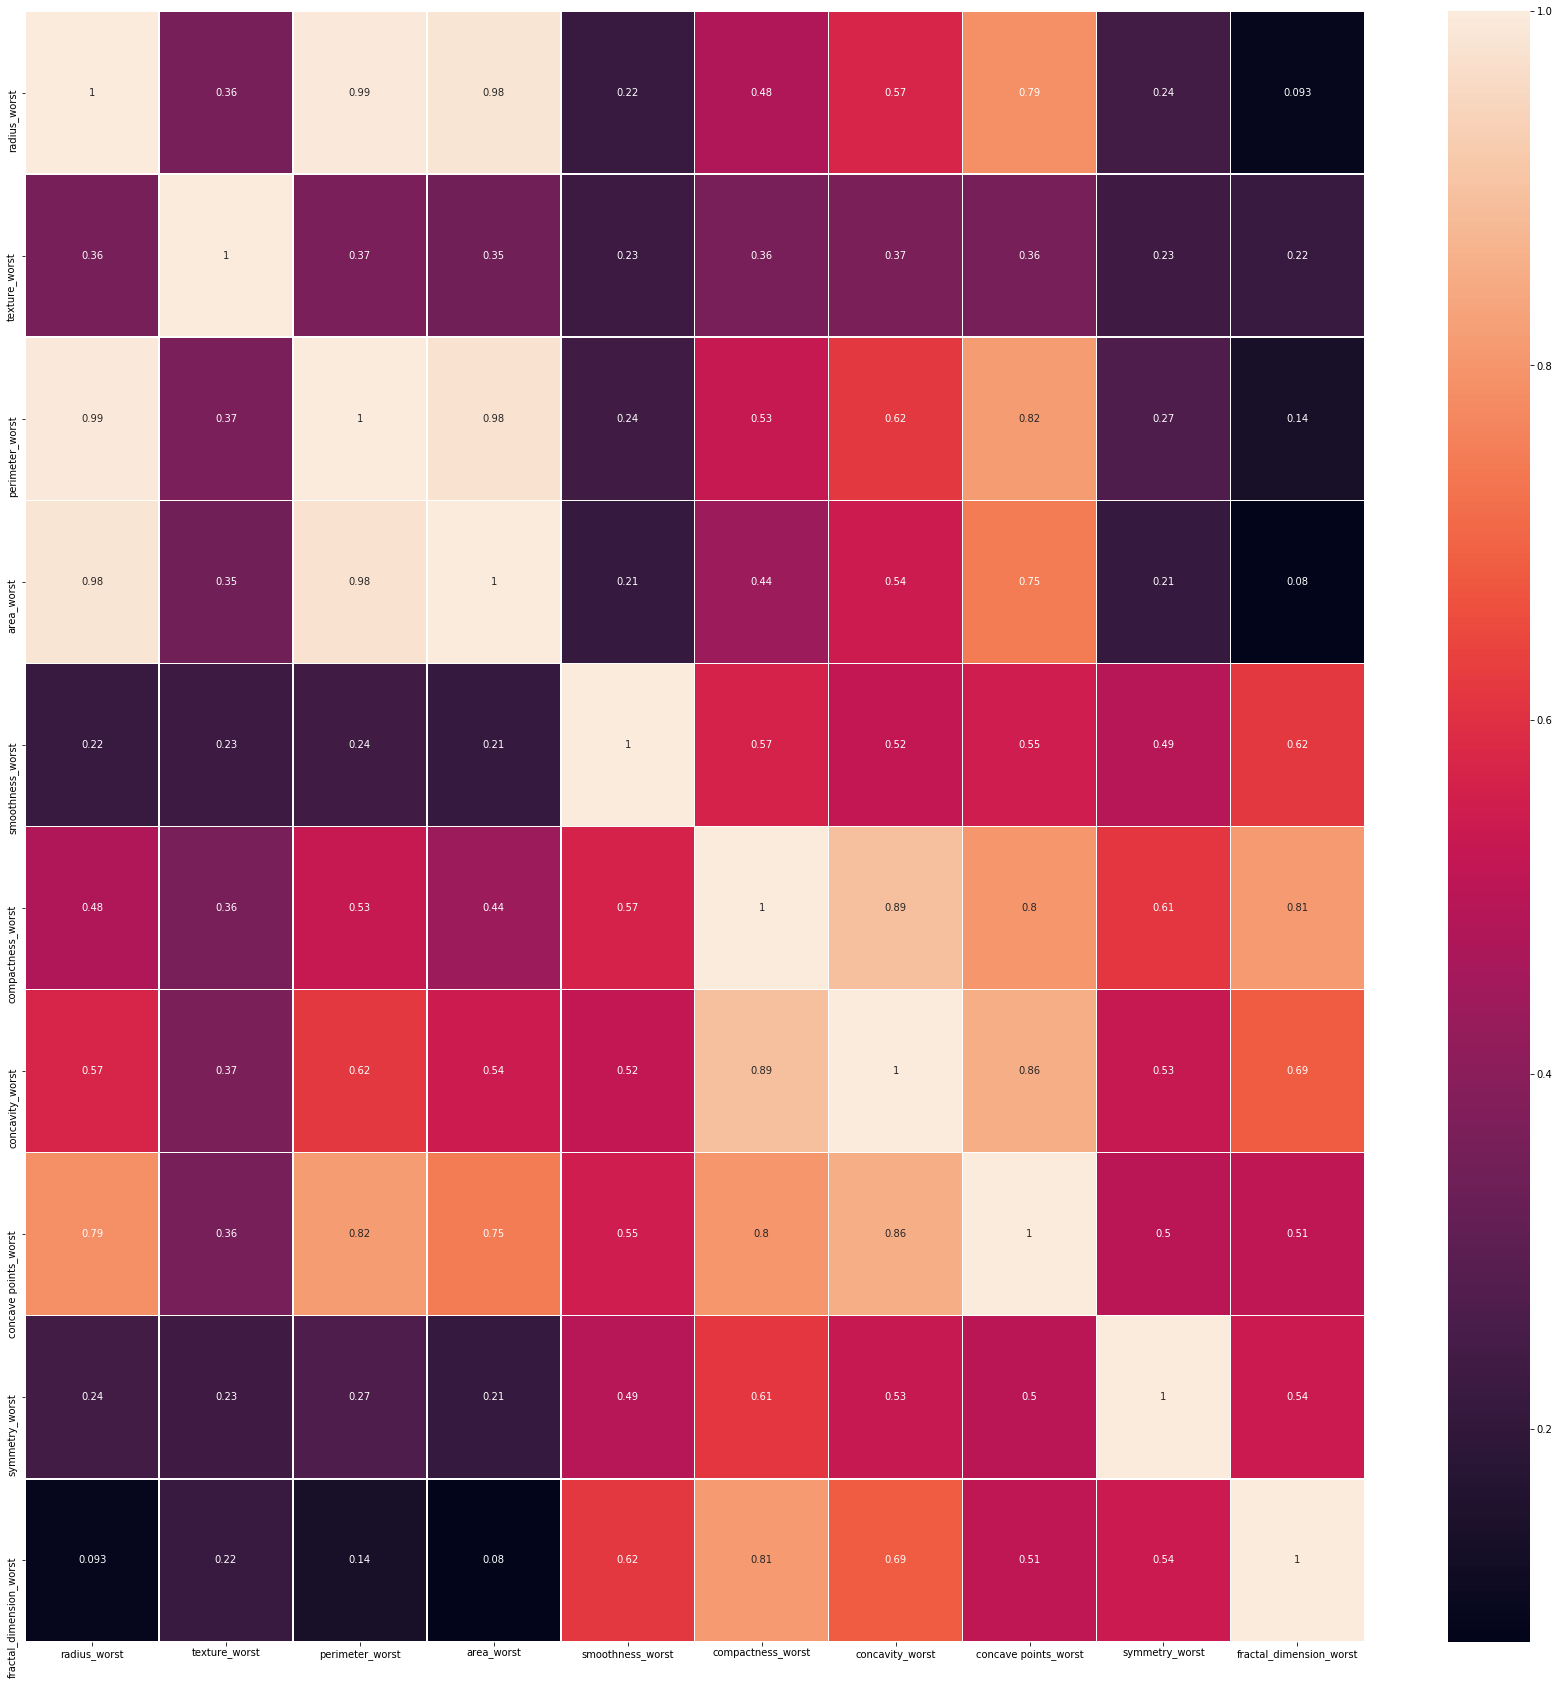

In [71]:
plt.figure(figsize = (30,30))
az = sns.heatmap(a.corr(), linewidths=.5, annot=True)

The following dist plots are useful for seeing the relative expanse of each parameters with one another. This will give us an idea on how to regularize the data to give the best results.

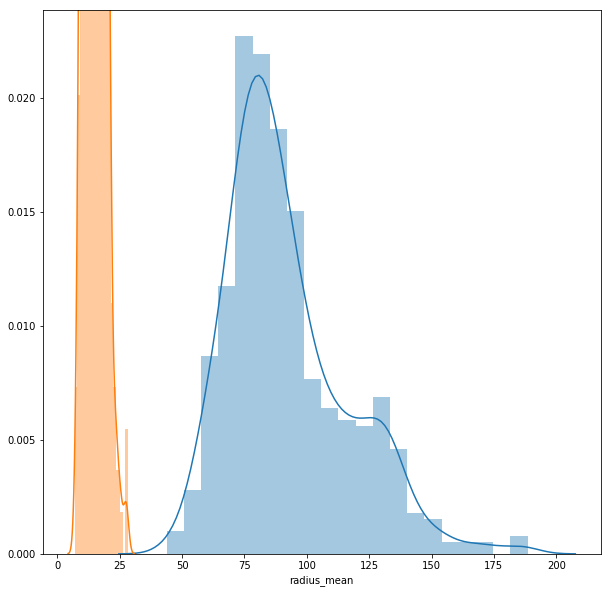

In [72]:
#a4_dims = (11.7, 8.27)
#ax = plt.subplots(figsize=a4_dims)
plt.figure(figsize = (10,10))
sns.distplot(data["perimeter_mean"])
sns.distplot(data["radius_mean"])

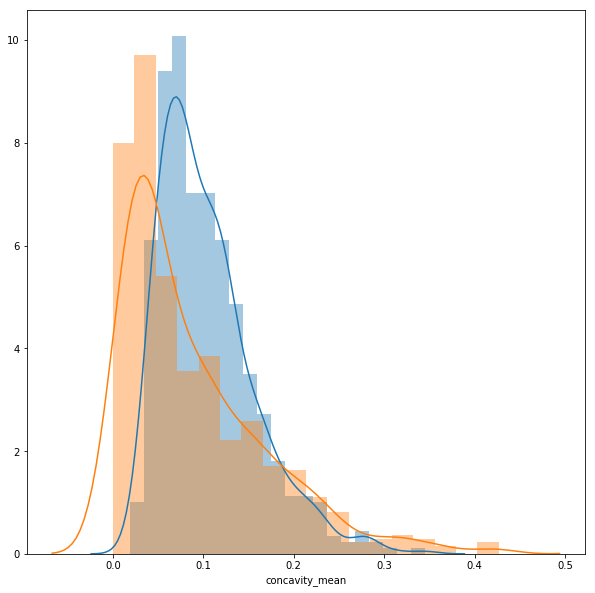

In [73]:
plt.figure(figsize = (10,10))
sns.distplot(data["compactness_mean"])
sns.distplot(data["concavity_mean"])

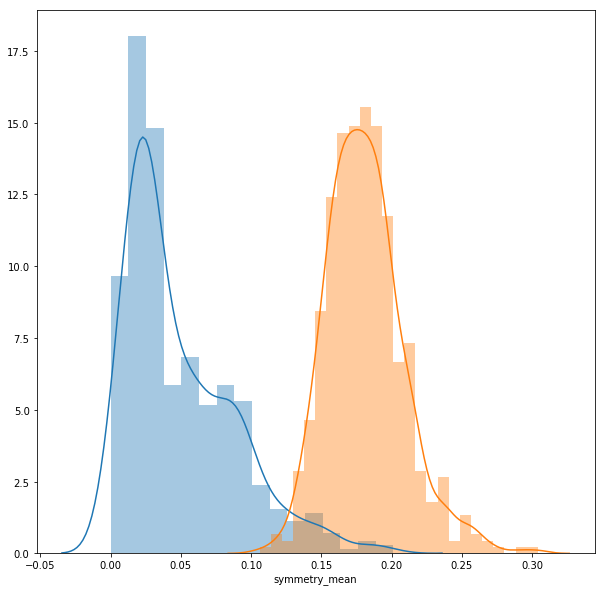

In [74]:
plt.figure(figsize = (10,10))
sns.distplot(data["concave points_mean"])
sns.distplot(data["symmetry_mean"])

The following box plots are a crude representation of the 'range' of values of each parameter and the resultant answer. For ex, the plot for radius mean below, the means for M and B are seperated by a good margin and the correspoding 'box' i.e. deviation from the mean if although quite far yet not overlapping making it a very useful feature for us to include. 

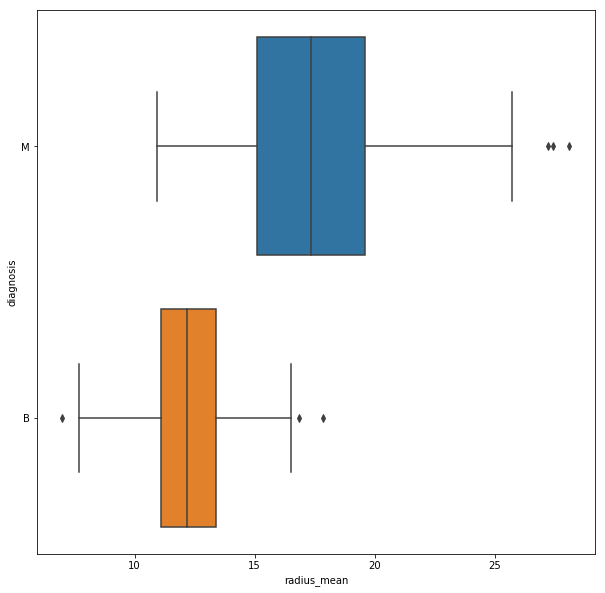

In [75]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.figure(figsize = (10,10))

sns.boxplot(data["radius_mean"],data["diagnosis"])

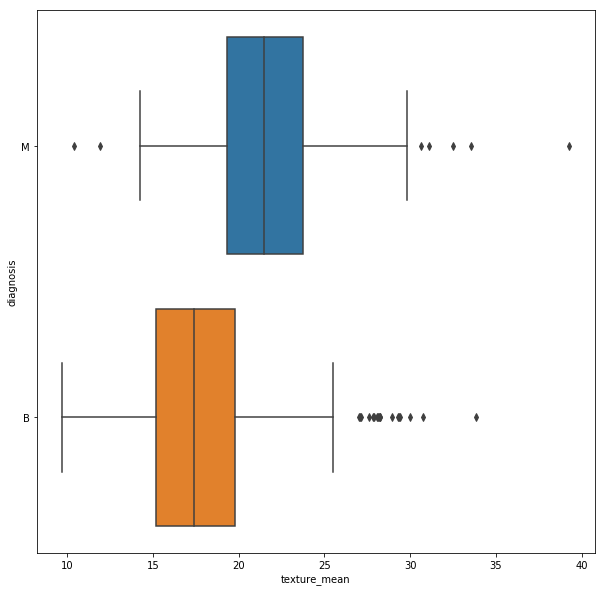

In [76]:
plt.figure(figsize = (10,10))

sns.boxplot(data["texture_mean"],data["diagnosis"])

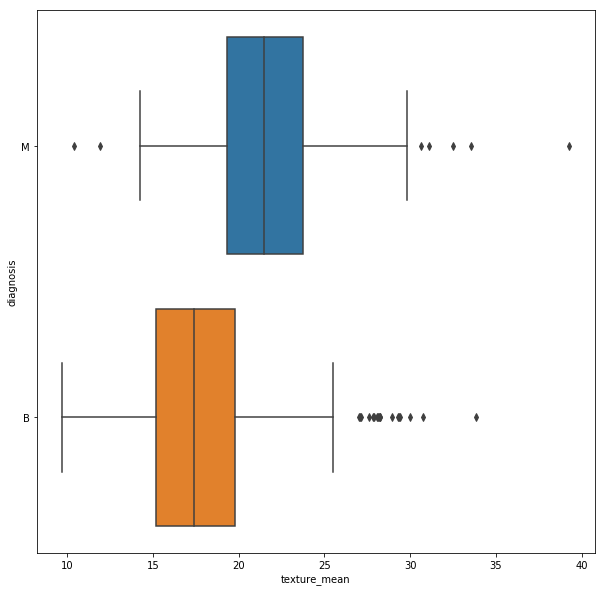

In [77]:
plt.figure(figsize = (10,10))

sns.boxplot(data["texture_mean"],data["diagnosis"])
#sns.boxplot(data["perimeter_mean"],data["radius_mean"])

The following swarm plots are for each mean parameter and will give a clear idea for which features to include ( eg concavity_mean) and which to not ( eg fractal_mean ).

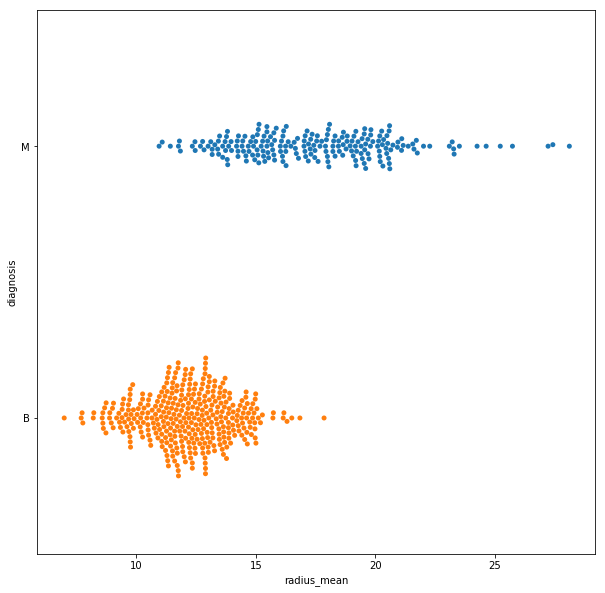

In [78]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["radius_mean"],data["diagnosis"])

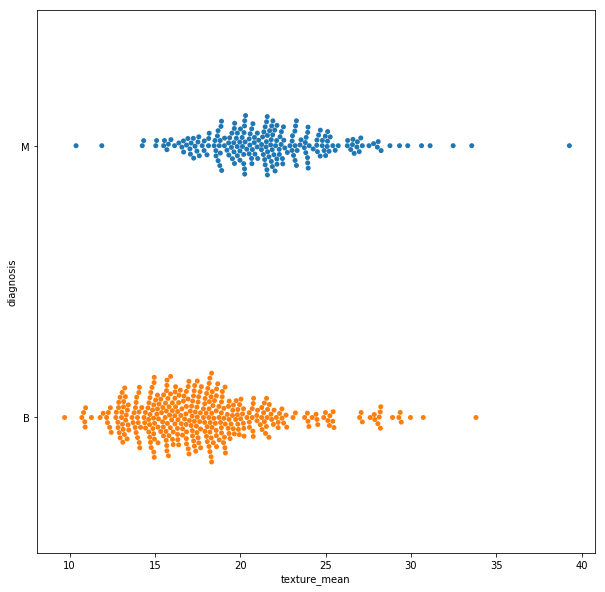

In [79]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["texture_mean"],data["diagnosis"])

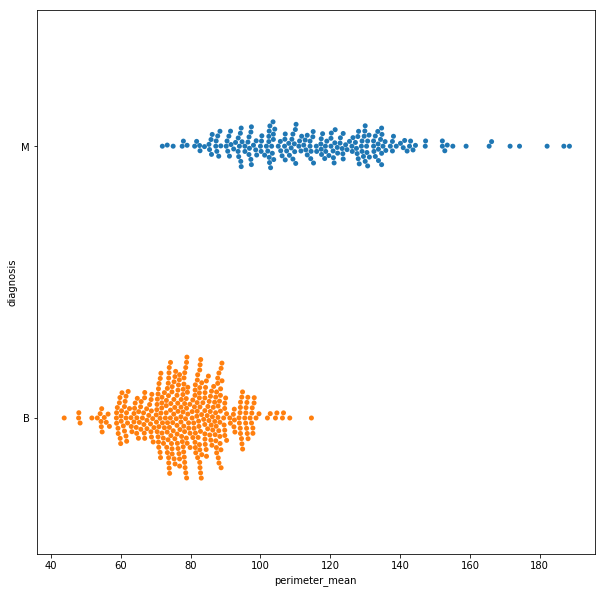

In [80]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["perimeter_mean"],data["diagnosis"])

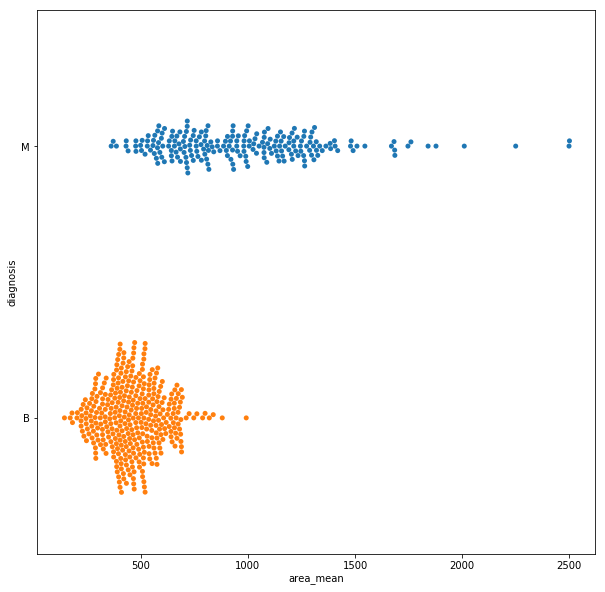

In [81]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["area_mean"],data["diagnosis"])

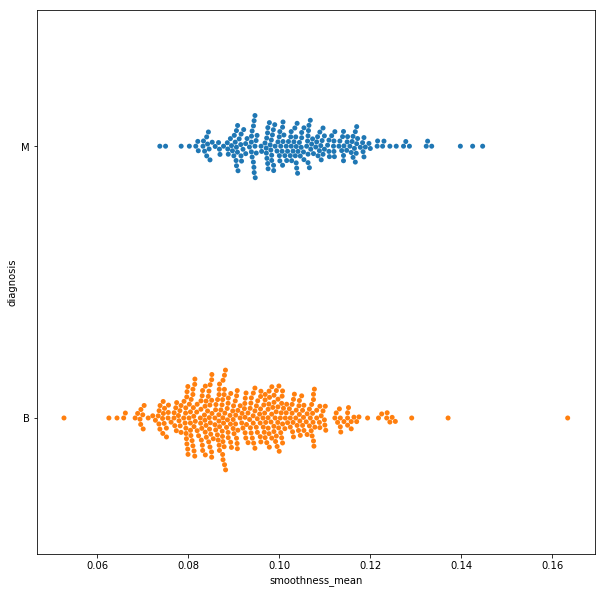

In [82]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["smoothness_mean"],data["diagnosis"])

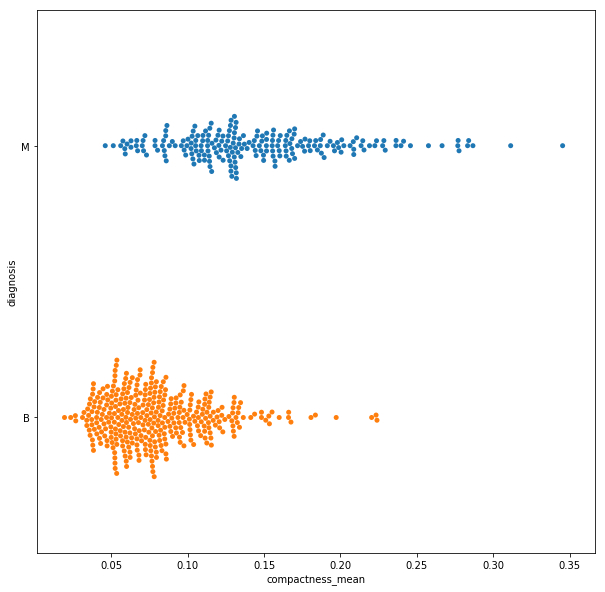

In [83]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["compactness_mean"],data["diagnosis"])

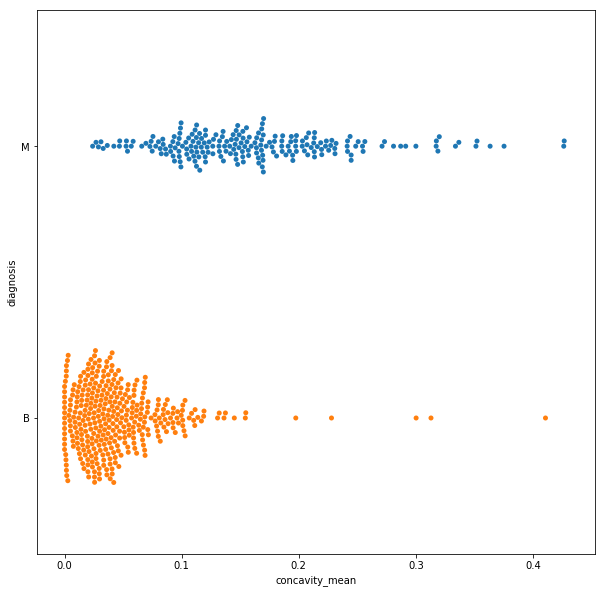

In [84]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["concavity_mean"],data["diagnosis"])

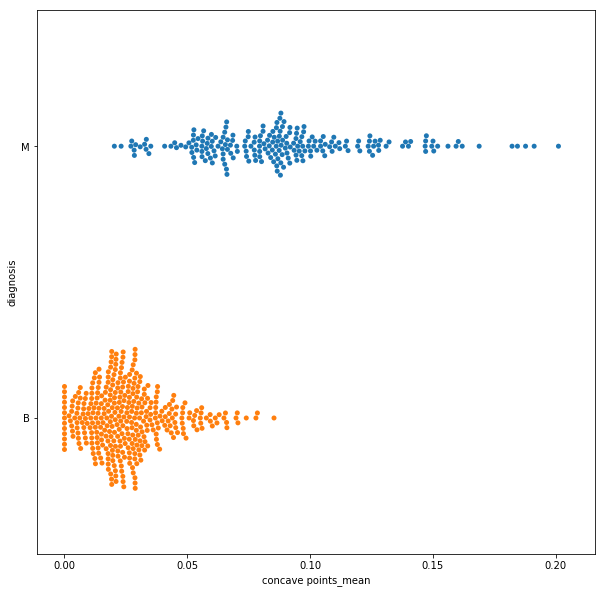

In [85]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["concave points_mean"],data["diagnosis"])

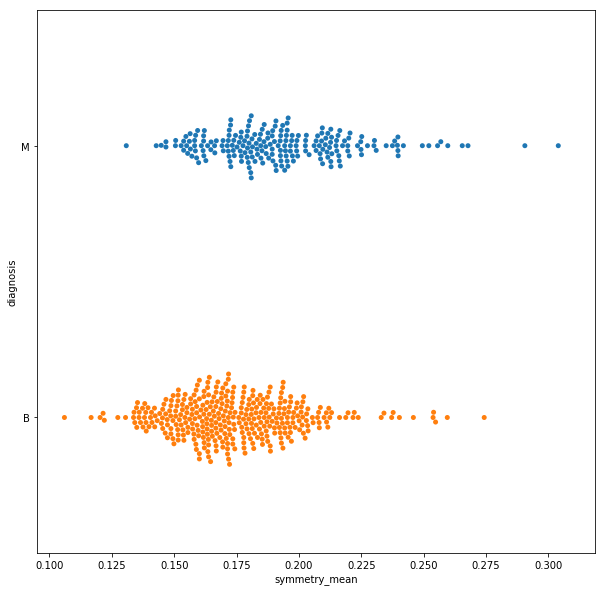

In [86]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["symmetry_mean"],data["diagnosis"])

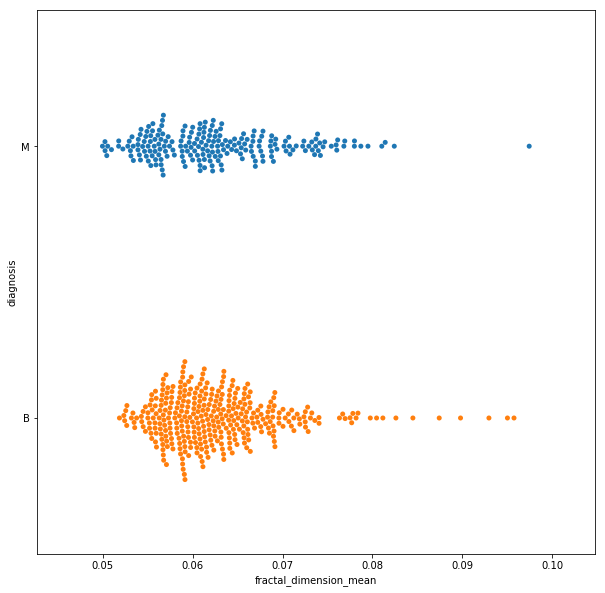

In [87]:
plt.figure(figsize = (10,10))

sns.swarmplot(data["fractal_dimension_mean"],data["diagnosis"])

Variable of concavity_worst and concave point_worst looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.92 is looks enough to say that they are correlated.
Similarily radius with area and perimeter, there is a strong correlation in these parameters.

fractal_dimension_mean and texture_mean plot for eg, the personr value is negative, hence we can conculude these features aren't similar at all.

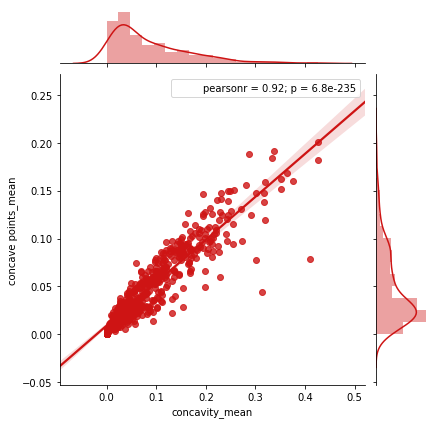

In [88]:
sns.jointplot(x.loc[:,'concavity_mean'], x.loc[:,'concave points_mean'], kind="regg", color="#ce1414")

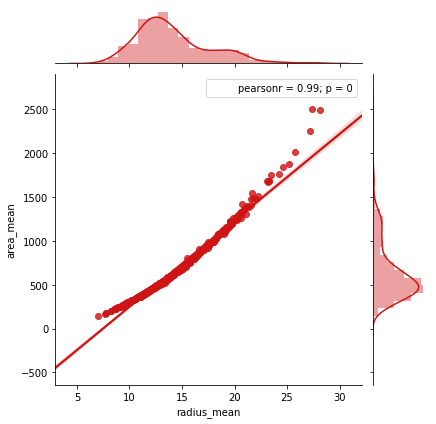

In [89]:
sns.jointplot(x.loc[:,'radius_mean'], x.loc[:,'area_mean'], kind="regg", color="#ce1414")

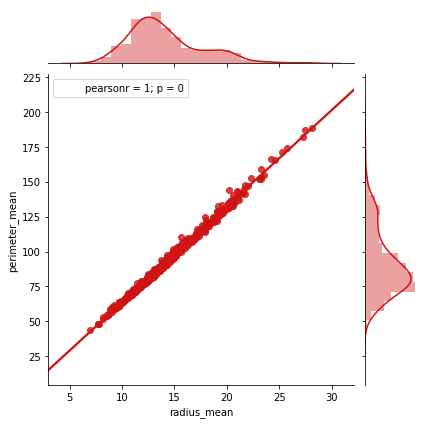

In [90]:
sns.jointplot(x.loc[:,'radius_mean'], x.loc[:,'perimeter_mean'], kind="regg", color="#ce1414")

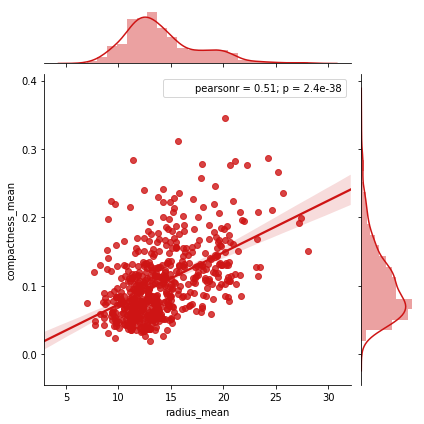

In [91]:
sns.jointplot(x.loc[:,'radius_mean'], x.loc[:,'compactness_mean'], kind="regg", color="#ce1414")

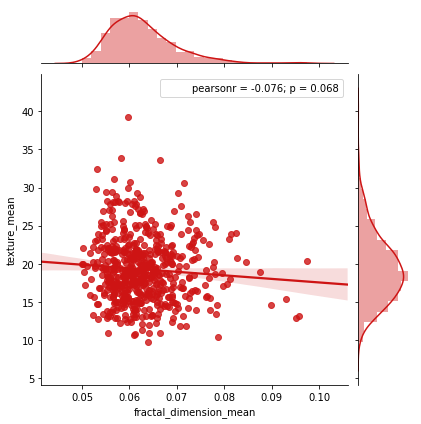

In [92]:
sns.jointplot(x.loc[:,'fractal_dimension_mean'], x.loc[:,'texture_mean'], kind="regg", color="#ce1414")

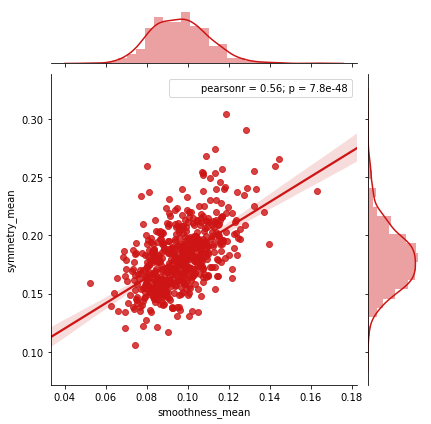

In [93]:
sns.jointplot(x.loc[:,'smoothness_mean'], x.loc[:,'symmetry_mean'], kind="regg", color="#ce1414")

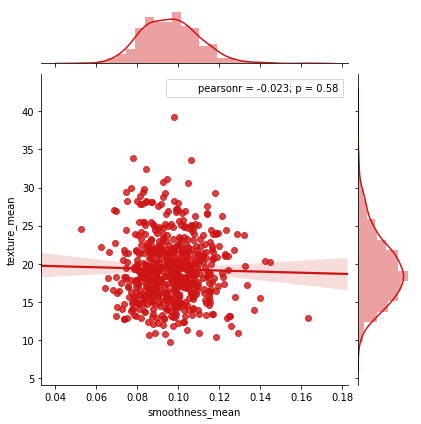

In [94]:
sns.jointplot(x.loc[:,'smoothness_mean'], x.loc[:,'texture_mean'], kind="regg", color="#ce1414")

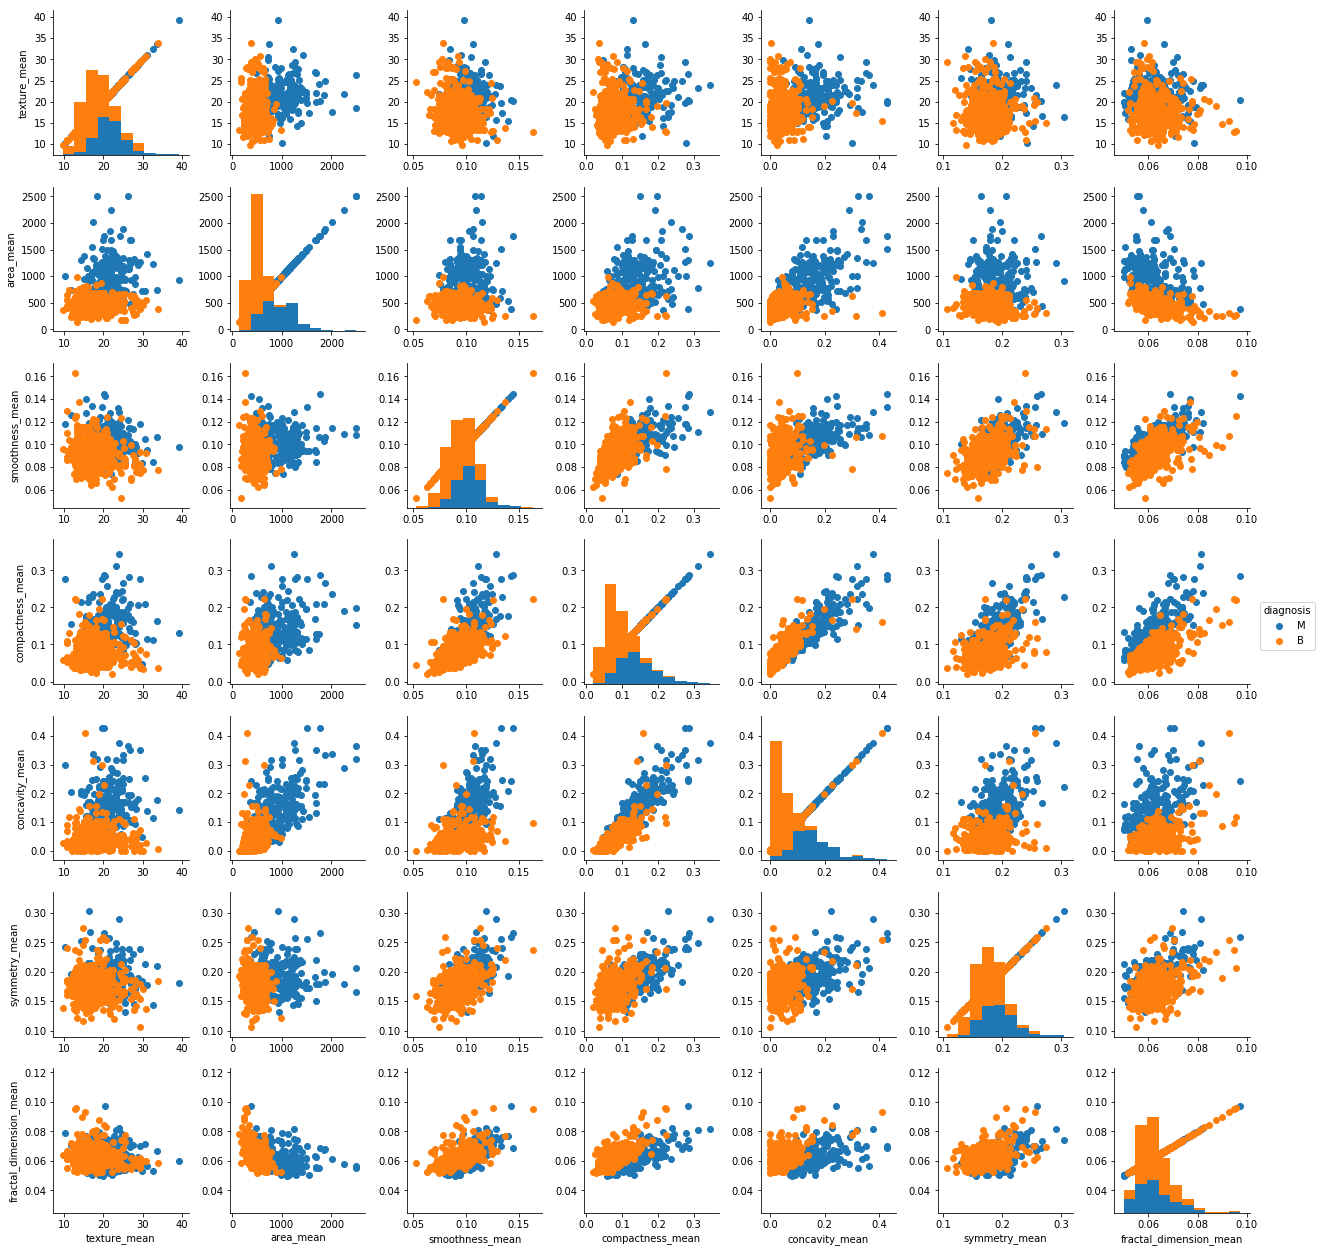

In [95]:
a = data.drop(['Unnamed: 32','id','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','radius_mean','texture_worst','perimeter_worst','perimeter_mean','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','concave points_mean','symmetry_worst','fractal_dimension_worst'],axis=1)
g = sns.PairGrid(a, hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map(plt.scatter)
g = g.add_legend()

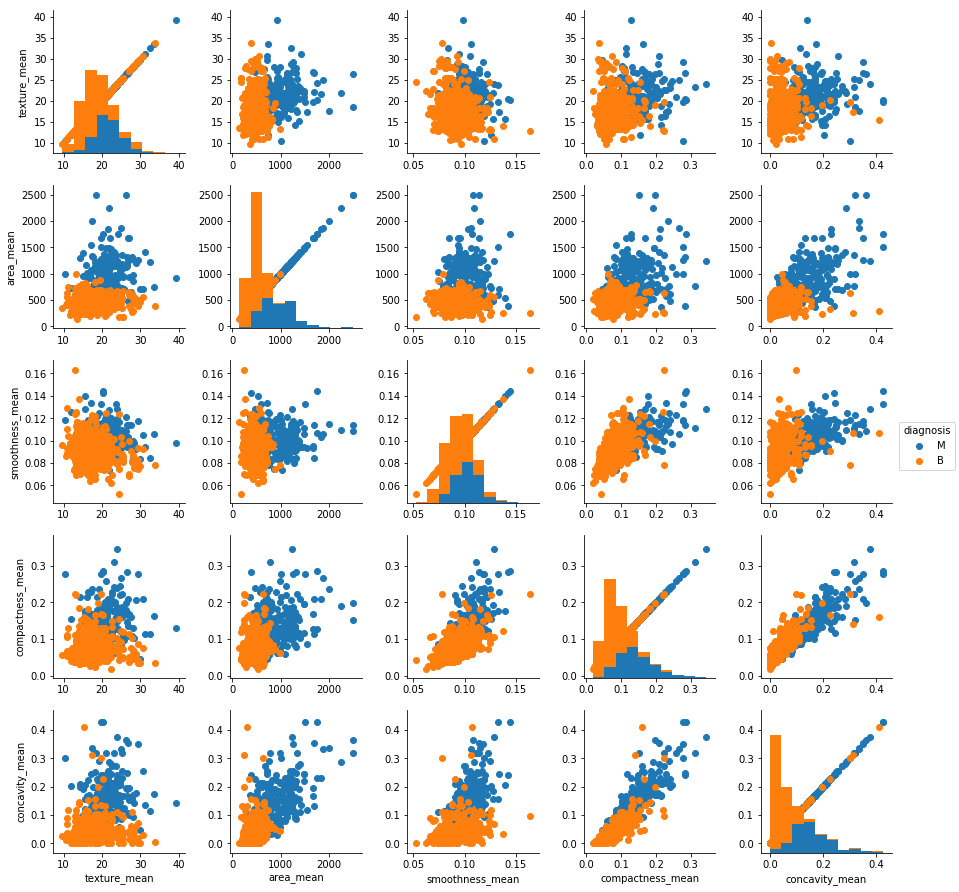

In [96]:
a = data.drop(['Unnamed: 32','id','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','radius_mean','texture_worst','perimeter_worst','perimeter_mean','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','concave points_mean','symmetry_worst','symmetry_mean','fractal_dimension_worst','fractal_dimension_mean'],axis=1)
g = sns.PairGrid(a, hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map(plt.scatter)
g = g.add_legend()